# Trying to figure out the relationship between shark presence (1) and shark absence (0) with continuous environmental parameters

In [1]:
# Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy
import statsmodels.formula.api as smf 

In [2]:
# Read in the dataset and do some quick data cleanup.
dat = pd.read_csv('D:/Documents/SpringBoard/capstone-1/datasets/final_files/combined/'
                  'filled/jackknifed_counts.csv', 
                 parse_dates=['Date']) 

dat['Receiver_D'] = dat['Receiver_D'].astype('category') # turn receiver D into a category
    # for analyses and plotting
dat['Year'] = dat['Year'].astype('category') # turn into a category
dat['Transmitter'] = pd.to_numeric(dat['Transmitter'], errors='coerce') # and make
    # sure that the 'Transmitter' (shark density) is numeric
    
dat['Receiver_D'] = dat['Receiver_D'].cat.remove_unused_categories()

In [3]:
dat['presence'] = dat['Transmitter'].copy() # make a copy of the transmitter data
dat['presence'].values[dat['presence'].values > 1] = 1 # and convert transmitter vals > 1
    # to 1

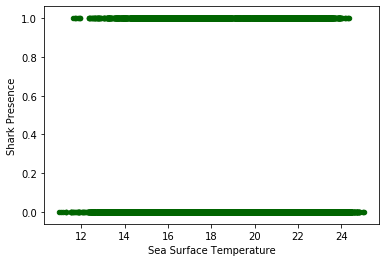

In [4]:
dat.plot('TempC','presence',kind='scatter', color='darkgreen') # plot presence vs absence
plt.ylabel('Shark Presence')
plt.xlabel('Sea Surface Temperature')
plt.show()

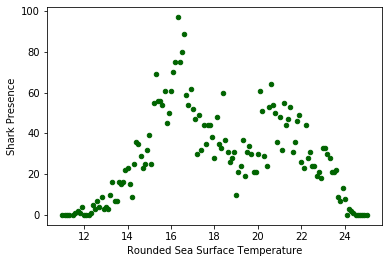

In [5]:
# I don't really see an easy-to-interpret trend here... 
# What if I try counting the sum of values in each 0.1 SST degree increment? 
# So higher values will indicate more cells having a shark in it at that temperature? 

rounded = pd.DataFrame(dat, copy=True) # copy

rounded['roundedTempC'] = round(rounded['TempC'], ndigits=1)
    # let's round temperature to the nearest 0.1 and add it as a new column

sst_m = rounded[['presence', 'roundedTempC']].groupby('roundedTempC').agg('sum').fillna(0).reset_index()
    # let's create a new dataframe that takes the relevant parameters, groups by the
    # rounded temperature, and shoots out the sum of shark presence for that temperature
    # also, lets fill NAs and reset the index

sst_m.plot('roundedTempC','presence',kind='scatter', color='darkgreen') # show 
plt.xlabel('Rounded Sea Surface Temperature')
plt.ylabel('Shark Presence')
plt.show()

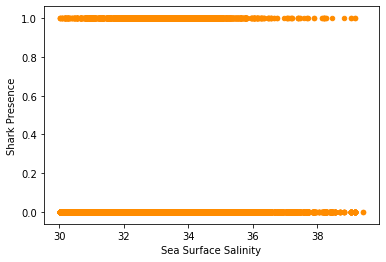

In [6]:
dat.plot('Sal', 'presence', kind='scatter', color='darkorange')
plt.xlabel('Sea Surface Salinity')
plt.ylabel('Shark Presence')
plt.show()

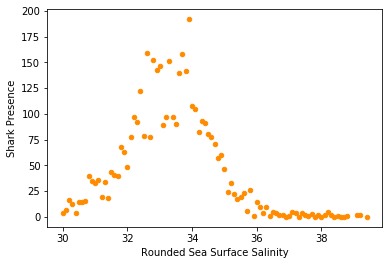

In [7]:
# Let's round the salinity to 0.1 digits too and see if we can see
# more zones with sharks at specific salinities?
rounded['roundedSal'] = round(rounded['Sal'], ndigits=1)
    # round to the nearest 0.1 and add it as a new column

sal_m = rounded[['presence', 'roundedSal']].groupby('roundedSal').agg('sum').fillna(0).reset_index()
    # get sum for each rounded temperature
    
# Plot it
sal_m.plot('roundedSal','presence',kind='scatter', color='darkorange')
plt.xlabel('Rounded Sea Surface Salinity')
plt.ylabel('Shark Presence')
plt.show()

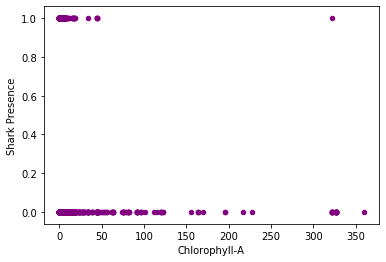

In [8]:
dat.plot('ChlA', 'presence', kind='scatter', color='purple')
plt.xlabel('Chlorophyll-A')
plt.ylabel('Shark Presence')
plt.show()

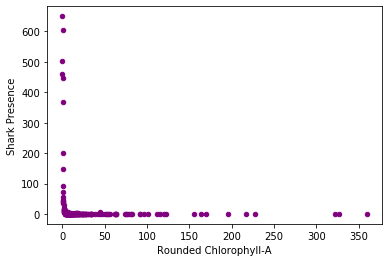

In [9]:
# There actually might be a binomial relationship here. Maybe worth exploring more?

rounded['roundedChlA'] = round(rounded['ChlA'], ndigits=1)
    # round to the nearest 0.1 and add it as a new column

chla_m = rounded[['presence', 'roundedChlA']].groupby('roundedChlA').agg('sum').fillna(0).reset_index()
    # get the sum of the presence values for each chla
    
# plot it
chla_m.plot('roundedChlA','presence',kind='scatter', color='purple')
plt.xlabel('Rounded Chlorophyll-A')
plt.ylabel('Shark Presence')
plt.show()